# Прогнозирование. Да прибудет с вами сила Нострадамуса! 

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==1.5.3, matplotlib==3.10.3, seaborn==0.13.2` 

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==1.5.3 matplotlib==3.10.3 seaborn==0.13.2` 


## Содержание

* [Полезные ссылки](#Полезные-ссылки)


Привет! Пример с прогнозированием мы посмотрели в предыдущих ноутбуках. Теперь время вам самим закатать рукава. 

В данном разделе вам нужно разработать модель (модели) для прогнозирования количества осадков. Ваш прогноз будет использован для планирования сброса воды на вымышленной ГЭС, поэтому отнеситесь к заданию серьёзно.

Данные возьмите из [Kaggle](https://www.kaggle.com/datasets/poojag718/rainfall-timeseries-data). 

Целевая переменная - это колонка `precipitation`. 

Данные содержат в себе информацию о помесячных осадках с 2000 по 2020 годы. Мы можете использовать все доступные колонки на своё усмотрение. 

**Ваша цель** - это получить модель для прогнозирования количества осадков в месяц за последние 3 года в данных. Т.е. с 2018 по 2020 включительно. 

В даннных всего 1 временной ряд, так что можно не городить жирные функции пайплайны. 

Кратенько, что нужно будет сделать: 

* загрузить данные 
* провести анализ данных 
* найти существующие проблемы в данных 
* также не лишним будет посмотреть корреляцию
* разделить данные на выборки: train и test 
* предобработать данные 
  * обработать пропуски
  * обработать аномалии 
  * обработать дубликаты 
  * ... 
* создать baseline модель (это может быть что угодно)
* подготовить необходимые метрики и проанализировать результаты
* попытаться улучшить результаты baseline модели 

---

**Что мы ждём от вас в результате выполнения задания?** 

* Готовый  **рабочий** ноутбук, при запуске которого можно воспроизвести все ваши результаты.
* В анализе данных необходимы краткие выводы, что вы нашли и почему вам показалось это интересным.
* В анализе результатов моделей необходимо заключение, почему вы считаете, что ваша модель успешно справляется с поставленной задачей. Ну, или почему не справляется  😵
* Больше графиков богу графиков!

Удачи Вам! 

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/umbrella_cat.jpg" width=600/></p>

## Полезные ссылки
* [Rainfall series data](https://www.kaggle.com/datasets/poojag718/rainfall-timeseries-data)


# Загрузка данных и анализ


In [1]:
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 7]
plt.style.use('seaborn-v0_8')

import seaborn as sns
sns.set(style="darkgrid")

import ipywidgets as widgets
import numpy as np 
import pandas as pd 
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
# Загрузка файла
data_fpath = Path().cwd().parent / "datasets" / "Rainfall_data.csv"
df = pd.read_csv(data_fpath)
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


### Общая информация о данных

In [13]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific Humidity  252 non-null    float64
 4   Relative Humidity  252 non-null    float64
 5   Temperature        252 non-null    float64
 6   Precipitation      252 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB


,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
203,2016,12,1,9.28,53.94,20.38,0.03
83,2006,12,1,10.86,62.12,17.57,0.35
144,2012,1,1,8.18,54.44,21.98,0.00
3,2000,4,1,13.79,55.69,22.49,0.02
168,2014,1,1,9.52,56.69,22.52,0.75


Уже видно, что Precipitation может содержать аномальные всплески — проверим позже графически

### Проверка пропусков и дубликатов

In [6]:
df.isna().sum()

Year                 0
Month                0
Day                  0
Specific Humidity    0
Relative Humidity    0
Temperature          0
Precipitation        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [30]:
df.sample(5, random_state=42)

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation,Month_sin,Month_cos
165,2013,10,1,17.40,81.94,14.21,88.57,-0.866025,0.500000
6,2000,7,1,18.80,88.50,6.67,820.45,-0.500000,-0.866025
111,2009,4,1,12.27,47.75,22.87,0.54,0.866025,-0.500000
172,2014,5,1,15.38,56.56,17.28,12.83,0.500000,-0.866025
115,2009,8,1,19.41,89.44,6.26,403.09,-0.866025,-0.500000


Отлично! дупликатов и пропусков нет, а значения выглядят реалистично

### Начинаем анализ данных

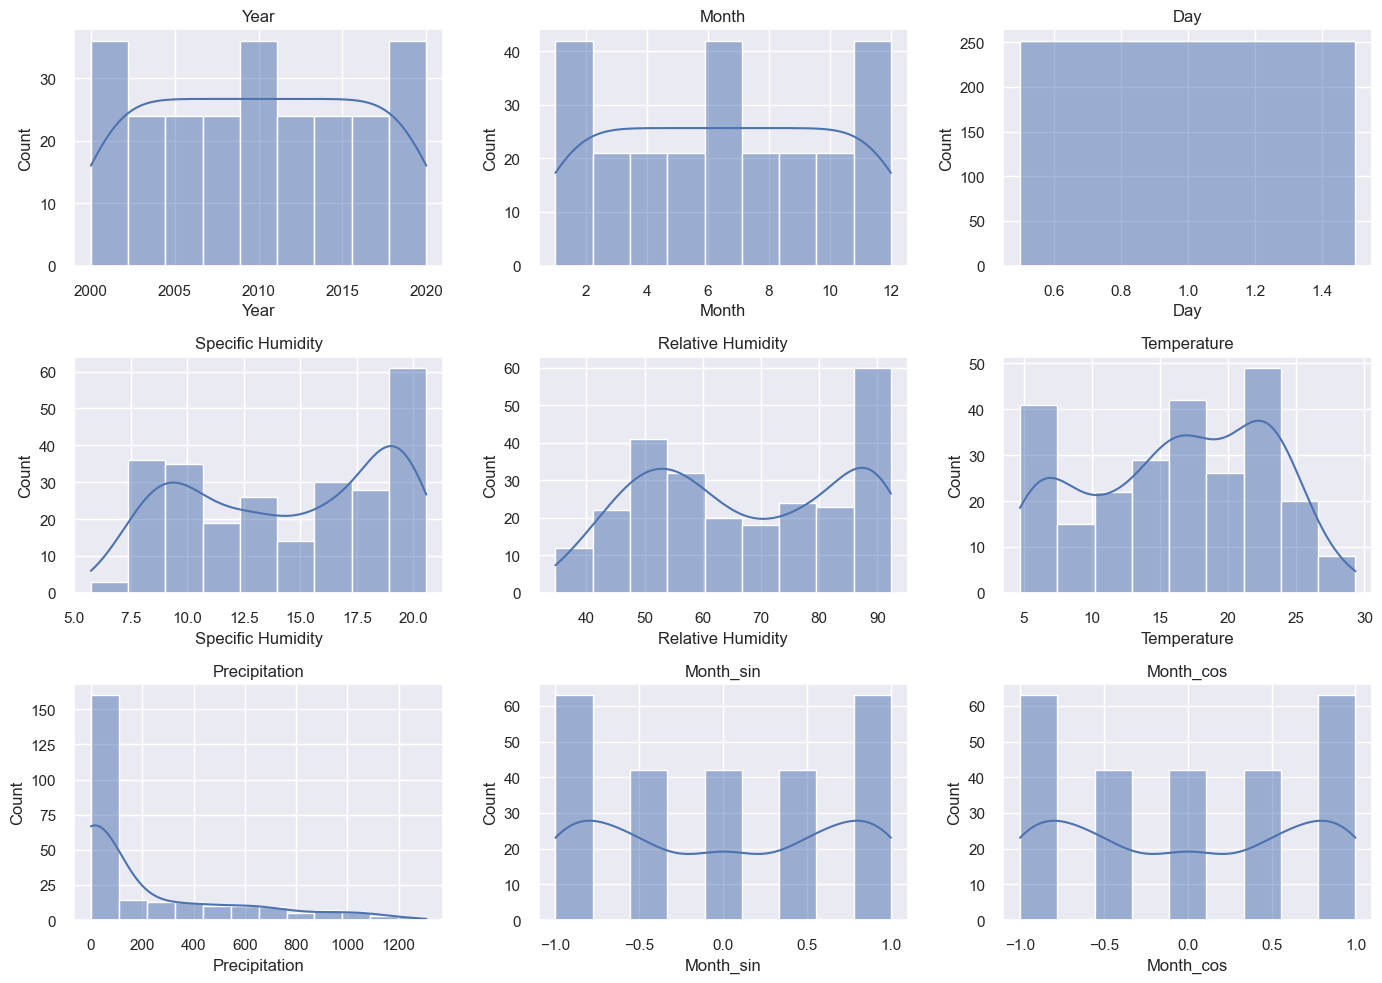

In [31]:
numeric_cols = df.select_dtypes(include="number").columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Можем видеть чёткую разницу между температурой и влажностью
Осадки же слабо коррелируют с другими параметрами - прогнозировать их будет сложнее.

## Предобработка данных для модели

Пропусков и дубликатов как мы помним у нас нет, тк что будем искать неинформативные признаки, чтобы избавиться от них

In [32]:
df.nunique()

Year                  21
Month                 12
Day                    1
Specific Humidity    136
Relative Humidity    219
Temperature          231
Precipitation        205
Month_sin             11
Month_cos             11
dtype: int64

Например Day

In [33]:
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed.drop(columns=["Day"])

# Контроль
df_preprocessed.info()
df_preprocessed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Specific Humidity  252 non-null    float64
 3   Relative Humidity  252 non-null    float64
 4   Temperature        252 non-null    float64
 5   Precipitation      252 non-null    float64
 6   Month_sin          252 non-null    float64
 7   Month_cos          252 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 15.9 KB


,Year,Month,Specific Humidity,Relative Humidity,Temperature,Precipitation,Month_sin,Month_cos
0,2000,1,8.06,48.25,23.93,0.00,0.500000,8.660254e-01
1,2000,2,8.73,50.81,25.83,0.11,0.866025,5.000000e-01
2,2000,3,8.48,42.88,26.68,0.01,1.000000,6.123234e-17
3,2000,4,13.79,55.69,22.49,0.02,0.866025,-5.000000e-01
4,2000,5,17.40,70.88,19.07,271.14,0.500000,-8.660254e-01


Лёгкая валидация значений (логические проверки)

In [34]:
# Осадки не могут быть отрицательными — проверим
(df_preprocessed["Precipitation"] < 0).sum(), df_preprocessed["Precipitation"].min()

# Температуры в разумных пределах (быстрая sanity-check)
df_preprocessed["Temperature"].min(), df_preprocessed["Temperature"].max()

(4.73, 29.34)

### Разделение данных на обучение и тест

In [35]:
# Целевая переменная
target = "Precipitation"

# Признаки (все столбцы кроме целевого)
features = df_preprocessed.drop(columns=[target]).columns.tolist()

X = df_preprocessed[features]
y = df_preprocessed[target]

X.head(), y.head()

(   Year  Month  Specific Humidity  Relative Humidity  Temperature  Month_sin  \
 0  2000      1               8.06              48.25        23.93   0.500000   
 1  2000      2               8.73              50.81        25.83   0.866025   
 2  2000      3               8.48              42.88        26.68   1.000000   
 3  2000      4              13.79              55.69        22.49   0.866025   
 4  2000      5              17.40              70.88        19.07   0.500000   
 
       Month_cos  
 0  8.660254e-01  
 1  5.000000e-01  
 2  6.123234e-17  
 3 -5.000000e-01  
 4 -8.660254e-01  ,
 0      0.00
 1      0.11
 2      0.01
 3      0.02
 4    271.14
 Name: Precipitation, dtype: float64)

Будем предсказывать Precipitation

Делим на Train и Test

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% на тест — стандарт
    random_state=42    # фиксируем результат
)

X_train.shape, X_test.shape

((201, 7), (51, 7))

Проверим распределение целевой переменной в train/test

In [37]:
y_train.describe(), y_test.describe()

(count     201.000000
 mean      207.956020
 std       322.094255
 min         0.000000
 25%         0.370000
 50%         8.630000
 75%       350.500000
 max      1307.430000
 Name: Precipitation, dtype: float64,
 count      51.000000
 mean      202.238627
 std       304.851284
 min         0.000000
 25%         0.785000
 50%        17.290000
 75%       375.880000
 max      1095.380000
 Name: Precipitation, dtype: float64)

Распределение осадков в train и test сопоставимо, а значит, что можно обучать модель

### Baseline модель

Смотрим на точность модели

Обучение и прогнозирование!

In [42]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

Оцениваем качество модели

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
rmse = np.sqrt(mse)

mae, mse, rmse

(112.7408768223495, 26025.499626767585, 161.32420657411456)

Точность конечно храмает:(

Посмотрим на графиках

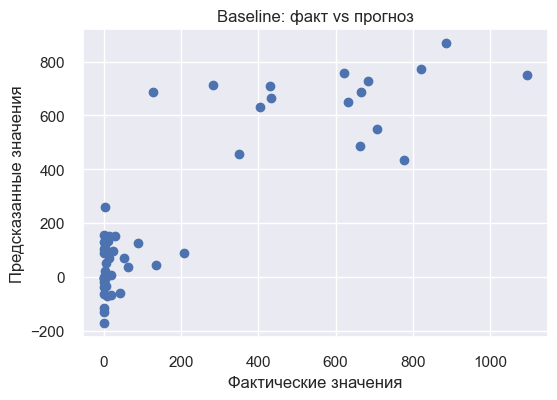

In [44]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_baseline)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Baseline: факт vs прогноз")
plt.show()

По графику, который должен строится по диагонали видно, что качество очень плохое

## Улучшаем модель

Осадки имеют длинный хвост, так что используем Лог-трансформации цели

In [49]:
X_train_enc = pd.get_dummies(X_train, columns=["Month"], drop_first=True)
X_test_enc  = pd.get_dummies(X_test,  columns=["Month"], drop_first=True)

X_train_enc.head(), X_test_enc.head()

(     Year  Specific Humidity  Relative Humidity  Temperature  Month_sin  \
 136  2011              16.17              60.94        15.72   0.500000   
 55   2004              18.98              90.62         5.70  -0.866025   
 204  2017               8.00              48.62        23.98   0.500000   
 216  2018               9.03              54.31        21.09   0.500000   
 147  2012              13.06              53.44        20.14   0.866025   
 
      Month_cos  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  \
 136  -0.866025        0        0        0        1        0        0        0   
 55   -0.500000        0        0        0        0        0        0        1   
 204   0.866025        0        0        0        0        0        0        0   
 216   0.866025        0        0        0        0        0        0        0   
 147  -0.500000        0        0        1        0        0        0        0   
 
      Month_9  Month_10  Month_11  Month_12  
 1

Лог-трансформация целевой переменной

In [50]:
y_train_log = np.log1p(y_train) 
y_test_log = np.log1p(y_test)

Обучаем модель на лог-таргете

In [51]:
from sklearn.linear_model import LinearRegression

log_model = LinearRegression()
log_model.fit(X_train_enc, y_train_log)

LinearRegression()

Делаем прогноз

In [53]:
y_pred_log = log_model.predict(X_test_enc)
y_pred_log = np.where(y_pred_log < 0, 0, y_pred_log) #чтоб не было отрицательных лог-значений
y_pred = np.expm1(y_pred_log)

Оцениваем модель

In [54]:
mae_log = mean_absolute_error(y_test, y_pred)
mse_log = mean_squared_error(y_test, y_pred)
rmse_log = np.sqrt(mse_log)

mae_log, mse_log, rmse_log

(67.98131342552381, 19767.488400865997, 140.59690039565595)

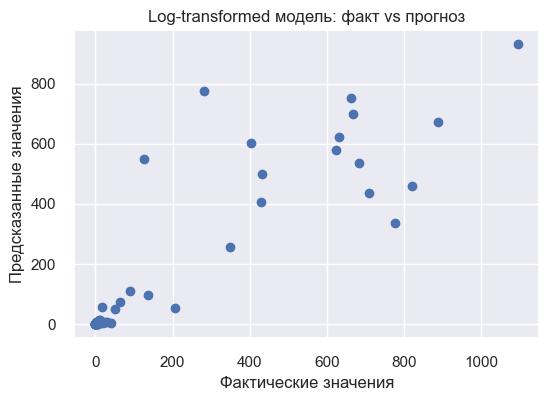

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Log-transformed модель: факт vs прогноз")
plt.show()

Можем видеть, что модель стала заметно точнее, как по метрикам, так и по графику

## Финал

Чтоб улучшить модель думаю можно объединить способы улучшения модели, а не использовать одну единственную.

Я чтоб улучшить модель использовал лог-трансформацию цели. Но думаю можно скомбинировать например с PolynomialFeatures